## Final Project 3: Exploratory Data Analysis

Loading the python libraries needed for this project:

https://www.kaggle.com/lislejoem/us_energy_census_gdp_10-14

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)

pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Read in dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'final-project', 'Energy Census and Economic Data US 2010-2014.csv'))
df.head(10)

,StateCodes,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AK,4.0,9.0,1.0,0.0,653221,653637,649341,621107,603119,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
1,AL,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,1958221,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
2,AR,4.0,8.0,0.0,0.0,1120632,1122544,1067642,1096438,1114409,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
3,AZ,3.0,7.0,0.0,0.0,1383531,1424944,1395839,1414383,1422590,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
4,CA,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,7620082,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406
5,CO,4.0,8.0,0.0,0.0,1513547,1470445,1440781,1470844,1477177,...,2.074200,2.010735,5.183397,5.553675,6.977583,7.587163,6.933159,7.660864,9.051783,9.597898
6,CT,1.0,1.0,1.0,0.0,764970,739130,725019,754901,750019,...,4.753602,4.730950,-3.384435,-5.611492,-4.731638,-7.286252,1.116894,-1.059166,0.021964,-2.555302
7,DC,3.0,5.0,0.0,0.0,190529,183806,172963,175560,178929,...,5.871584,5.749218,11.332882,10.005838,9.777666,1.793572,16.805955,15.595790,15.649250,7.542790
8,DE,3.0,5.0,1.0,0.0,250212,272568,273728,273716,274013,...,2.608949,2.565489,2.866848,3.598380,3.397171,5.148174,5.303282,6.221263,6.006120,7.713663
9,FL,3.0,5.0,1.0,0.0,4282673,4141711,4029903,4076406,4121680,...,5.783717,5.687300,5.540393,5.125320,4.918783,7.016123,11.359606,10.722573,10.702501,12.703423


## Exploration

What are we working with?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 191 entries, StateCodes to RNETMIG2014
dtypes: float64(99), int64(91), object(1)
memory usage: 77.7+ KB


52 rows, consisting of the 50 united states of america, the district of columbia, and one for the USA as a whole. 191 columns covering region, energy, economic, and census features over the 2010 to 2014 period. 

In [4]:
df.columns.values

array(['StateCodes', 'Region', 'Division', 'Coast', 'Great Lakes',
       'TotalC2010', 'TotalC2011', 'TotalC2012', 'TotalC2013',
       'TotalC2014', 'TotalP2010', 'TotalP2011', 'TotalP2012',
       'TotalP2013', 'TotalP2014', 'TotalE2010', 'TotalE2011',
       'TotalE2012', 'TotalE2013', 'TotalE2014', 'TotalPrice2010',
       'TotalPrice2011', 'TotalPrice2012', 'TotalPrice2013',
       'TotalPrice2014', 'TotalC10-11', 'TotalC11-12', 'TotalC12-13',
       'TotalC13-14', 'TotalP10-11', 'TotalP11-12', 'TotalP12-13',
       'TotalP13-14', 'TotalE10-11', 'TotalE11-12', 'TotalE12-13',
       'TotalE13-14', 'TotalPrice10-11', 'TotalPrice11-12',
       'TotalPrice12-13', 'TotalPrice13-14', 'BiomassC2010',
       'BiomassC2011', 'BiomassC2012', 'BiomassC2013', 'BiomassC2014',
       'CoalC2010', 'CoalC2011', 'CoalC2012', 'CoalC2013', 'CoalC2014',
       'CoalP2010', 'CoalP2011', 'CoalP2012', 'CoalP2013', 'CoalP2014',
       'CoalE2010', 'CoalE2011', 'CoalE2012', 'CoalE2013', 'CoalE2014',
    

### Summary

In [5]:
df.describe()

/Users/sameerkurien/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,TotalP2010,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
count,51.000000,51.000000,51.000000,51.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,...,52.000000,52.000000,51.000000,51.000000,51.000000,51.000000,52.000000,52.000000,52.000000,52.000000
mean,2.666667,5.117647,0.450980,0.156863,3.748043e+06,3.723920e+06,3.631132e+06,3.736541e+06,3.784461e+06,2.759090e+06,...,2.545359,2.501026,0.309307,0.617791,0.773470,-0.086251,2.587748,3.117434,3.303955,2.416433
std,1.051982,2.534932,0.502543,0.367290,1.339845e+07,1.331718e+07,1.298862e+07,1.336881e+07,1.354064e+07,1.038432e+07,...,1.598187,1.569279,3.334579,4.332419,4.776573,4.895949,3.602628,4.383237,4.819083,4.794439
min,1.000000,1.000000,0.000000,0.000000,1.536970e+05,1.504750e+05,1.304120e+05,1.375270e+05,1.398970e+05,9.500000e+01,...,0.631283,0.628523,-5.839158,-5.946809,-5.482049,-13.754494,-3.182714,-3.382339,-3.778986,-10.884734
25%,NaN,NaN,NaN,NaN,6.488725e+05,6.483915e+05,6.468032e+05,6.499528e+05,6.552158e+05,2.444558e+05,...,1.411803,1.392360,NaN,NaN,NaN,NaN,0.421528,0.092413,0.002172,-0.273974
50%,NaN,NaN,NaN,NaN,1.482116e+06,1.447694e+06,1.417946e+06,1.449638e+06,1.457408e+06,6.383085e+05,...,2.042578,2.019803,NaN,NaN,NaN,NaN,1.709057,1.642785,2.051458,1.524206
75%,NaN,NaN,NaN,NaN,2.533853e+06,2.448560e+06,2.378196e+06,2.443520e+06,2.461348e+06,1.499262e+06,...,3.201814,3.142864,NaN,NaN,NaN,NaN,4.264455,5.460200,5.720351,5.357469
max,4.000000,9.000000,1.000000,1.000000,9.744602e+07,9.682746e+07,9.441143e+07,9.714137e+07,9.838521e+07,7.459311e+07,...,6.426691,6.074495,11.332882,15.589637,23.189451,12.265101,16.805955,17.804574,25.104485,14.028192


In [6]:
df['Division'].unique()

array([  9.,   6.,   8.,   7.,   1.,   5.,   4.,   3.,   2.,  nan])

In [7]:
df['Region'].unique()

array([  4.,   3.,   1.,   2.,  nan])

Region: The number corresponding to the region the state lies within, according to the 2010 census. (1 = Northeast, 2 = Midwest, 3 = South, 4 = West)

Division: The number corresponding to the division the state lies within, according to the 2010 census. (1 = New England, 2 = Middle Atlantic, 3 = East North Central, 4 = West North Central, 5 = South Atlantic, 6 = East South Central, 7 = West South Central, 8 = Mountain, 9 = Pacific)

### Cleaning

The US row isn't necessary.

In [3]:
# TODO
df = df[df.StateCodes != 'US']
df.tail(10)


,StateCodes,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
41,SD,2.0,4.0,0.0,0.0,378514,378470,375950,389619,391857,...,1.751176,1.706026,2.449458,5.243945,5.197576,0.661688,3.990580,7.059852,6.948752,2.367714
42,TN,3.0,6.0,0.0,0.0,2247273,2195401,2080953,2132508,2194512,...,1.417493,1.404195,2.452525,4.286281,2.089798,3.757448,3.696271,5.729927,3.507291,5.161643
43,TX,3.0,7.0,1.0,0.0,11687521,11906249,11931169,12660976,12899498,...,3.201213,3.166214,4.577945,5.630982,4.428284,5.778507,7.675275,8.724163,7.629497,8.944721
45,UT,4.0,8.0,0.0,0.0,756012,794058,790154,831668,797995,...,1.888857,1.869754,-0.328821,-0.030685,1.920812,-0.422534,1.419762,1.759980,3.809669,1.447220
46,VA,3.0,5.0,1.0,0.0,2483360,2380922,2343908,2414477,2430205,...,4.195152,4.098421,1.331717,0.603915,0.304183,-2.458330,4.975221,5.003800,4.499335,1.640092
47,VT,1.0,1.0,0.0,0.0,153697,150475,130412,137527,139897,...,1.150844,1.147264,-0.752251,-2.604208,-1.098171,-2.471644,0.255542,-1.516859,0.052674,-1.324380
48,WA,4.0,9.0,1.0,0.0,2031428,2059630,2037127,2036309,2011941,...,3.455210,3.396158,3.446470,1.962177,2.250746,3.998925,6.416385,5.370291,5.705957,7.395083
49,WI,2.0,3.0,0.0,1.0,1791199,1778018,1721543,1813458,1868867,...,1.129419,1.139079,-1.094924,-1.653887,-1.369743,-1.727053,-0.058431,-0.619224,-0.240324,-0.587974
50,WV,3.0,5.0,0.0,0.0,738821,726341,720985,743612,752942,...,0.631283,0.628523,0.586117,0.562068,-1.252861,-1.484373,1.143656,1.171559,-0.621579,-0.855850
51,WY,4.0,8.0,0.0,0.0,540122,556548,550182,539146,535612,...,0.858535,0.830923,-0.362194,9.651174,4.547821,-4.577788,0.323325,10.610525,5.406356,-3.746865


In [10]:
df.describe()

,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,TotalP2010,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2.666667,5.117647,0.450980,0.156863,1.910827e+06,1.898360e+06,1.851126e+06,1.905074e+06,1.929544e+06,1.350580e+06,...,2.533146,2.488594,0.309307,0.617791,0.773470,-0.086251,2.580803,3.118718,3.306616,2.402342
std,1.051982,2.534932,0.502543,0.367290,2.019829e+06,2.032146e+06,2.006310e+06,2.094984e+06,2.126122e+06,2.182803e+06,...,1.611637,1.582306,3.334579,4.332419,4.776573,4.895949,3.638124,4.426843,4.866997,4.841058
min,1.000000,1.000000,0.000000,0.000000,1.536970e+05,1.504750e+05,1.304120e+05,1.375270e+05,1.398970e+05,9.500000e+01,...,0.631283,0.628523,-5.839158,-5.946809,-5.482049,-13.754494,-3.182714,-3.382339,-3.778986,-10.884734
25%,2.000000,3.000000,0.000000,0.000000,6.477830e+05,6.431460e+05,6.442655e+05,6.403375e+05,6.501755e+05,2.380995e+05,...,1.406113,1.380524,-1.238840,-1.919526,-1.559669,-2.519482,0.388793,-0.004725,-0.017619,-0.326182
50%,3.000000,5.000000,0.000000,0.000000,1.464503e+06,1.424944e+06,1.395839e+06,1.428433e+06,1.437640e+06,6.266390e+05,...,2.029017,2.010735,0.030893,-0.420875,-0.478459,-1.192172,1.684655,1.525589,1.933638,1.470449
75%,3.500000,7.500000,1.000000,0.000000,2.439536e+06,2.396369e+06,2.292558e+06,2.363081e+06,2.385196e+06,1.336681e+06,...,3.202415,3.084902,2.061860,3.463549,3.498414,3.710544,4.273934,5.550109,5.734746,5.499192
max,4.000000,9.000000,1.000000,1.000000,1.168752e+07,1.190625e+07,1.193117e+07,1.266098e+07,1.289950e+07,1.141213e+07,...,6.426691,6.074495,11.332882,15.589637,23.189451,12.265101,16.805955,17.804574,25.104485,14.028192


### Distribution of region and division

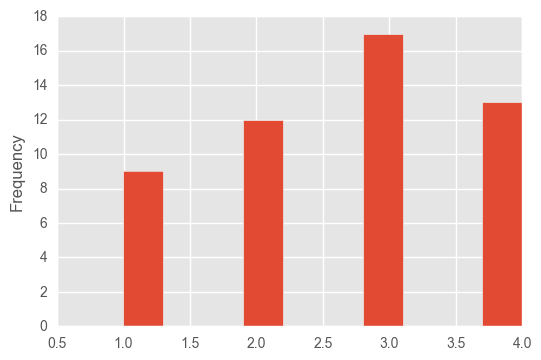

In [11]:

#df.boxplot(column= 'gre', return_type = 'axes')
df['Region'].plot(kind= 'hist')

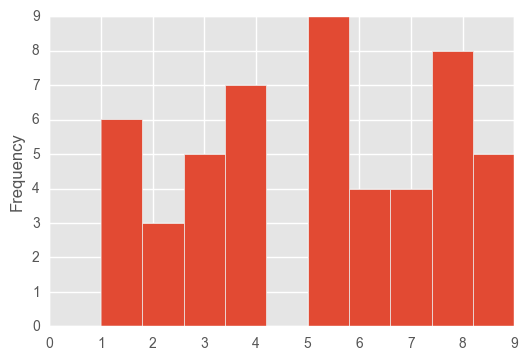

In [12]:
# TODO
df['Division'].plot(kind= 'hist')

### Distributions of total energy consumption and population

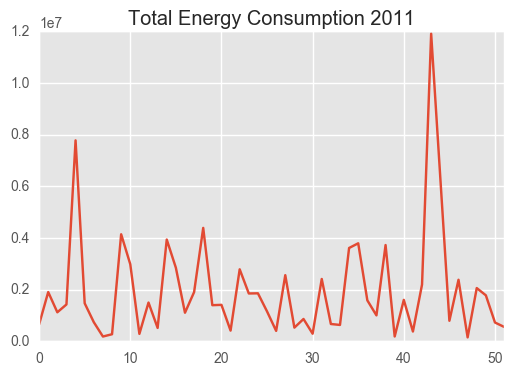

In [13]:
df['TotalC2011'].plot(kind= 'line', title = 'Total Energy Consumption 2011')

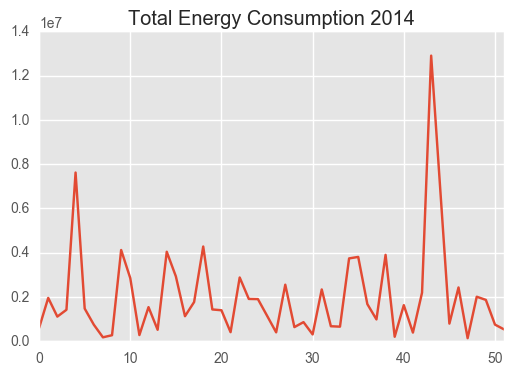

In [14]:
df['TotalC2014'].plot(kind= 'line', title = 'Total Energy Consumption 2014')

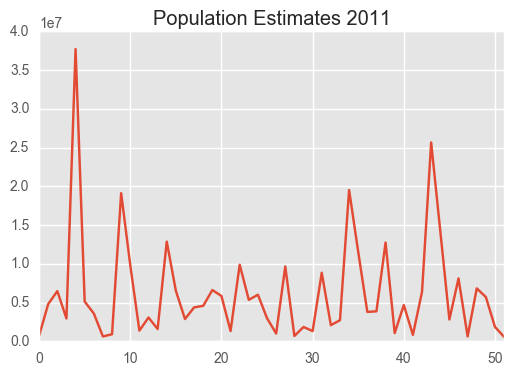

In [15]:
df['POPESTIMATE2011'].plot(kind= 'line', title = 'Population Estimates 2011')

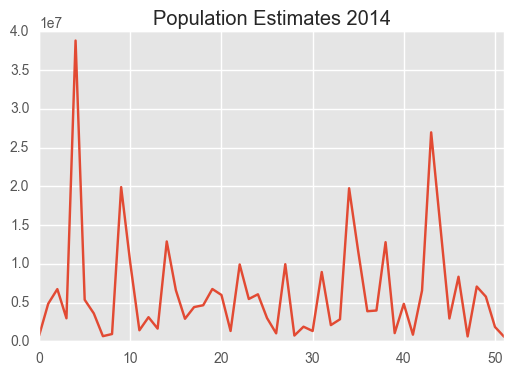

In [16]:
df['POPESTIMATE2014'].plot(kind= 'line', title = 'Population Estimates 2014')

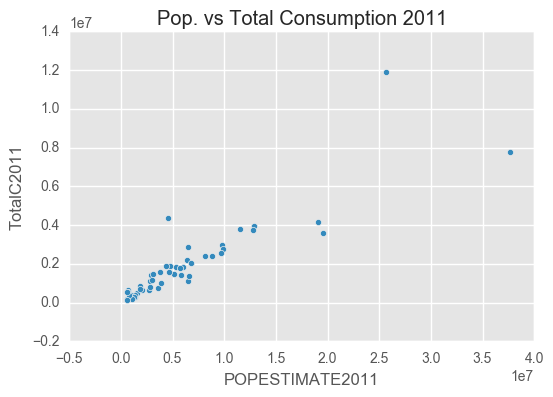

In [17]:
df.plot(kind='scatter', x='POPESTIMATE2011', y='TotalC2011', title = 'Pop. vs Total Consumption 2011');

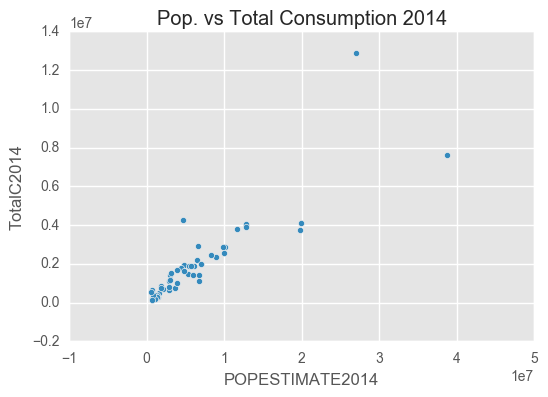

In [18]:
df.plot(kind='scatter', x='POPESTIMATE2014', y='TotalC2014', title = 'Pop. vs Total Consumption 2014');

From these plots we can see that there at least appears to be a positive correlation between Population and Total Energy Consumption in 2011 and 2014. We can also see at least one state definitvely spikes in energy use over this time period and that there are a few states that do not seem to conform to this trend.

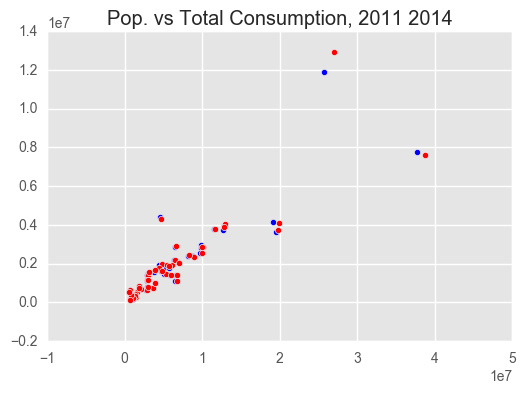

In [19]:
# TODO
plt.scatter(df.POPESTIMATE2011, df.TotalC2011, c= 'b', label = '2011')
plt.scatter(df.POPESTIMATE2014, df.TotalC2014, c= 'r', label = '2014')
plt.title('Pop. vs Total Consumption, 2011 2014')

### Looking at 2011 2014 population with other energy features
having more than 2 years makes scatter plots too busy to be easily understood, so sticking with 2011 and 2014 for overview.

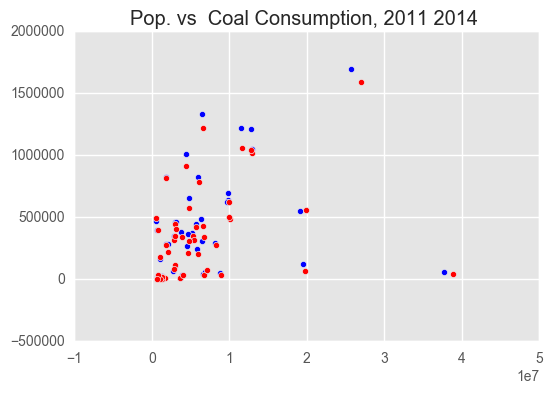

In [20]:
plt.scatter(df.POPESTIMATE2011, df.CoalC2011, c= 'b', label = '2011')
plt.scatter(df.POPESTIMATE2014, df.CoalC2014, c= 'r', label = '2014')
plt.title('Pop. vs  Coal Consumption, 2011 2014 ')

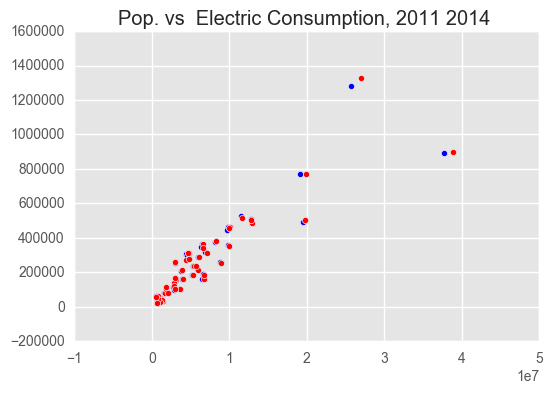

In [21]:
plt.scatter(df.POPESTIMATE2011, df.ElecC2011, c= 'b', label = '2011')
plt.scatter(df.POPESTIMATE2014, df.ElecC2014, c= 'r', label = '2014')
plt.title('Pop. vs  Electric Consumption, 2011 2014 ')

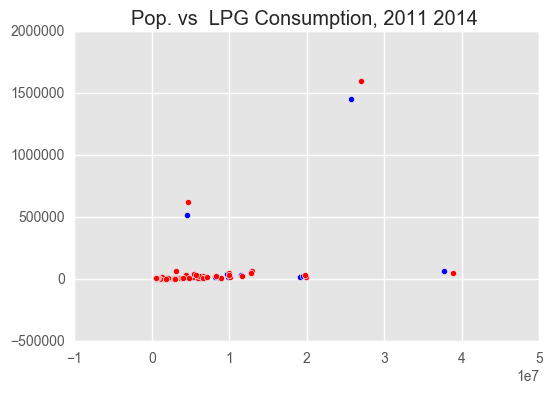

In [22]:
plt.scatter(df.POPESTIMATE2011, df.LPGC2011, c= 'b', label = '2011')
plt.scatter(df.POPESTIMATE2014, df.LPGC2014, c= 'r', label = '2014')
plt.title('Pop. vs  LPG Consumption, 2011 2014 ')

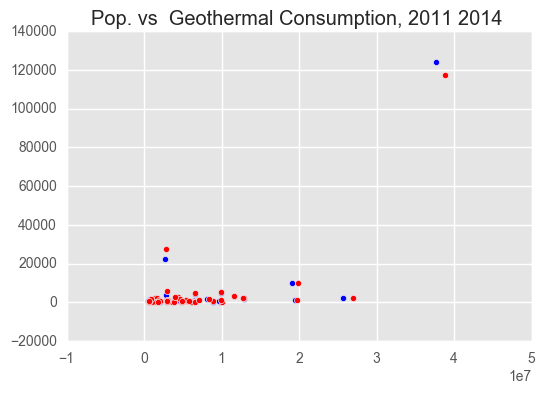

In [23]:
plt.scatter(df.POPESTIMATE2011, df.GeoC2011, c= 'b', label = '2011')
plt.scatter(df.POPESTIMATE2014, df.GeoC2014, c= 'r', label = '2014')
plt.title('Pop. vs  Geothermal Consumption, 2011 2014 ')

We can see that the relationships between population and the consumption of the subtypes of energy do vary. Of the four presented here, coal seems to have the greatest internal variation, while electric energy appears to be the most positive and linear. Having observed these two energy variables, we can see how the more specific population features relate to them.

### Looking at Coal and Electric energy in 2011 against other population measures

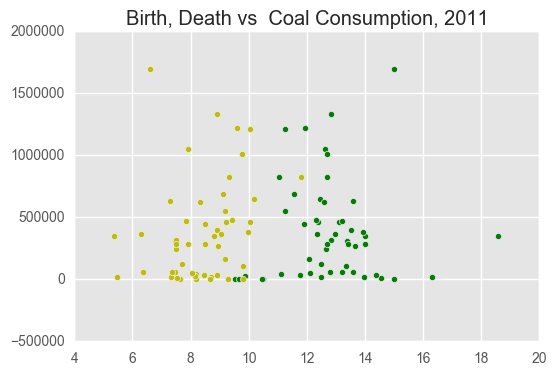

In [24]:
plt.scatter(df.RBIRTH2011, df.CoalC2011, c= 'g', label = 'birth')
plt.scatter(df.RDEATH2011, df.CoalC2011, c= 'y', label = 'death')
plt.title('Birth, Death vs  Coal Consumption, 2011')

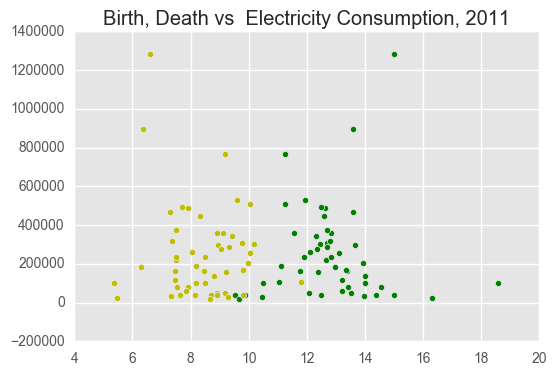

In [25]:
plt.scatter(df.RBIRTH2011, df.ElecC2011, c= 'g', label = 'birth')
plt.scatter(df.RDEATH2011, df.ElecC2011, c= 'y', label = 'death')
plt.title('Birth, Death vs  Electricity Consumption, 2011')

We can see neither birth nor death has an easily visible relationship with coal or electricity.

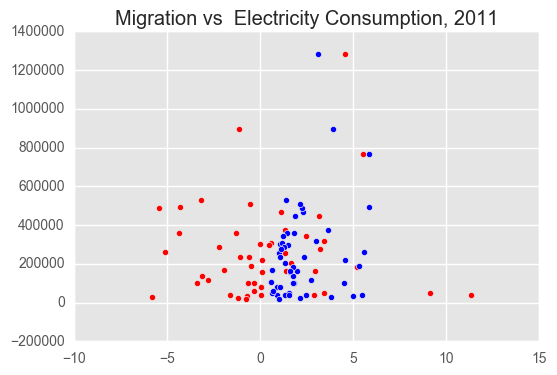

In [36]:
plt.scatter(df.RDOMESTICMIG2011, df.ElecC2011, c= 'r', label = 'domMig')
plt.scatter(df.RINTERNATIONALMIG2011, df.ElecC2011, c= 'b', label = 'intMig')
plt.title('Migration vs  Electricity Consumption, 2011')

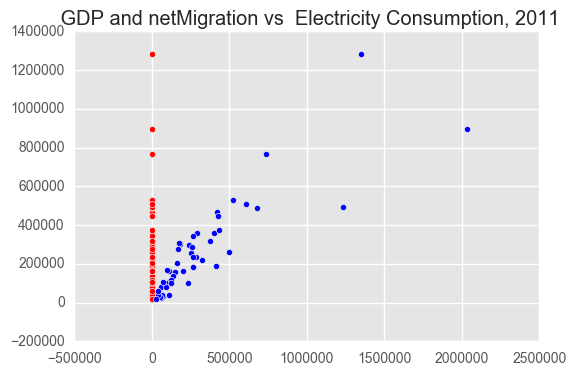

In [28]:
plt.scatter(df.RNETMIG2011, df.ElecC2011, c= 'r', label = 'netMig')
plt.scatter(df.GDP2011, df.ElecC2011, c= 'b', label = 'gdp2010')
plt.title(' GDP and netMigration vs  Electricity Consumption, 2011')

In [51]:
# drop gdp factors
df.drop(['GDP2010Q1', 'GDP2010Q2',
       'GDP2010Q3', 'GDP2010Q4', 'GDP2010', 'GDP2011Q1', 'GDP2011Q2',
       'GDP2011Q3', 'GDP2011Q4', 'GDP2011', 'GDP2012Q1', 'GDP2012Q2',
       'GDP2012Q3', 'GDP2012Q4', 'GDP2012', 'GDP2013Q1', 'GDP2013Q2',
       'GDP2013Q3', 'GDP2013Q4', 'GDP2013', 'GDP2014Q1', 'GDP2014Q2',
       'GDP2014Q3', 'GDP2014Q4', 'GDP2014'], axis =1, inplace =True)

In [35]:
df.columns.values


array(['StateCodes', 'Region', 'Division', 'Coast', 'Great Lakes',
       'TotalC2010', 'TotalC2011', 'TotalC2012', 'TotalC2013',
       'TotalC2014', 'TotalP2010', 'TotalP2011', 'TotalP2012',
       'TotalP2013', 'TotalP2014', 'TotalE2010', 'TotalE2011',
       'TotalE2012', 'TotalE2013', 'TotalE2014', 'TotalPrice2010',
       'TotalPrice2011', 'TotalPrice2012', 'TotalPrice2013',
       'TotalPrice2014', 'TotalC10-11', 'TotalC11-12', 'TotalC12-13',
       'TotalC13-14', 'TotalP10-11', 'TotalP11-12', 'TotalP12-13',
       'TotalP13-14', 'TotalE10-11', 'TotalE11-12', 'TotalE12-13',
       'TotalE13-14', 'TotalPrice10-11', 'TotalPrice11-12',
       'TotalPrice12-13', 'TotalPrice13-14', 'BiomassC2010',
       'BiomassC2011', 'BiomassC2012', 'BiomassC2013', 'BiomassC2014',
       'CoalC2010', 'CoalC2011', 'CoalC2012', 'CoalC2013', 'CoalC2014',
       'CoalP2010', 'CoalP2011', 'CoalP2012', 'CoalP2013', 'CoalP2014',
       'CoalE2010', 'CoalE2011', 'CoalE2012', 'CoalE2013', 'CoalE2014',
    

In [52]:
#drop all non consumption energy factors, Region and Great Lakes
df.drop(['Region', 'Great Lakes', 'TotalP2010', 'TotalP2011', 'TotalP2012',
       'TotalP2013', 'TotalP2014', 'TotalE2010', 'TotalE2011',
       'TotalE2012', 'TotalE2013', 'TotalE2014', 'TotalPrice2010',
       'TotalPrice2011', 'TotalPrice2012', 'TotalPrice2013',
       'TotalPrice2014', 'TotalC10-11', 'TotalC11-12', 'TotalC12-13',
       'TotalC13-14', 'TotalP10-11', 'TotalP11-12', 'TotalP12-13',
       'TotalP13-14', 'TotalE10-11', 'TotalE11-12', 'TotalE12-13',
       'TotalE13-14', 'TotalPrice10-11', 'TotalPrice11-12',
       'TotalPrice12-13', 'TotalPrice13-14', 
       'CoalP2010', 'CoalP2011', 'CoalP2012', 'CoalP2013', 'CoalP2014',
       'CoalE2010', 'CoalE2011', 'CoalE2012', 'CoalE2013', 'CoalE2014',
       'CoalPrice2010', 'CoalPrice2011', 'CoalPrice2012', 'CoalPrice2013',
       'CoalPrice2014',  'ElecE2010', 'ElecE2011', 'ElecE2012', 'ElecE2013',
       'ElecE2014', 'ElecPrice2010', 'ElecPrice2011', 'ElecPrice2012',
       'ElecPrice2013', 'ElecPrice2014',  'GeoP2010',
       'GeoP2011', 'GeoP2012', 'GeoP2013', 'GeoP2014', 
       'HydroP2010', 'HydroP2011', 'HydroP2012', 'HydroP2013',
       'HydroP2014',  'NatGasE2010', 'NatGasE2011',
       'NatGasE2012', 'NatGasE2013', 'NatGasE2014', 'NatGasPrice2010',
       'NatGasPrice2011', 'NatGasPrice2012', 'NatGasPrice2013',
       'NatGasPrice2014', 'LPGE2010', 'LPGE2011', 'LPGE2012', 'LPGE2013',
       'LPGE2014', 'LPGPrice2010', 'LPGPrice2011', 'LPGPrice2012',
       'LPGPrice2013', 'LPGPrice2014'], axis =1, inplace =True)

In [54]:
df.columns.values

array(['StateCodes', 'Division', 'Coast', 'TotalC2010', 'TotalC2011',
       'TotalC2012', 'TotalC2013', 'TotalC2014', 'BiomassC2010',
       'BiomassC2011', 'BiomassC2012', 'BiomassC2013', 'BiomassC2014',
       'CoalC2010', 'CoalC2011', 'CoalC2012', 'CoalC2013', 'CoalC2014',
       'ElecC2010', 'ElecC2011', 'ElecC2012', 'ElecC2013', 'ElecC2014',
       'FossFuelC2010', 'FossFuelC2011', 'FossFuelC2012', 'FossFuelC2013',
       'FossFuelC2014', 'GeoC2010', 'GeoC2011', 'GeoC2012', 'GeoC2013',
       'GeoC2014', 'HydroC2010', 'HydroC2011', 'HydroC2012', 'HydroC2013',
       'HydroC2014', 'NatGasC2010', 'NatGasC2011', 'NatGasC2012',
       'NatGasC2013', 'NatGasC2014', 'LPGC2010', 'LPGC2011', 'LPGC2012',
       'LPGC2013', 'LPGC2014', 'CENSUS2010POP', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'RBIRTH2011', 'RBIRTH2012', 'RBIRTH2013',
       'RBIRTH2014', 'RDEATH2011', 'RDEATH2012', 'RDEATH2013',
       'RDEATH2014', 'RNATU

In [9]:
#creat dummis for division
#1 = New England, 2 = Middle Atlantic, 3 = East North Central, 
#4 = West North Central, 5 = South Atlantic, 6 = East South Central, 
#7 = West South Central, 8 = Mountain, 9 = Pacific)
df = df.join(pd.get_dummies(df['Division']))
#df.drop(['Division'], axis =1, inplace =True)

In [62]:
df.head()

,StateCodes,Division,Coast,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,BiomassC2010,BiomassC2011,...,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,PopulationIncreased2014
0,AK,9.0,1.0,653221,653637,649341,621107,603119,4178,4247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,AL,6.0,1.0,1931522,1905207,1879716,1919365,1958221,169088,179611,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,True
2,AR,8.0,0.0,1120632,1122544,1067642,1096438,1114409,94865,97160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
3,AZ,7.0,0.0,1383531,1424944,1395839,1414383,1422590,29289,28565,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False
4,CA,9.0,1.0,7760629,7777115,7564063,7665241,7620082,280124,282581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True


In [10]:
df['PopulationIncreased2014'] = df['RNETMIG2014'] > 0.0

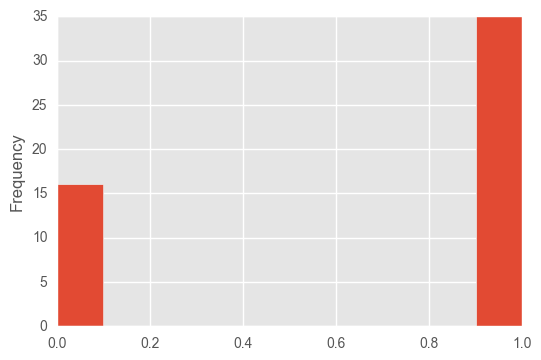

In [14]:
df['PopulationIncreased2014'].plot.hist(by='Divsion') 